In [122]:
from turbustat.statistics import PCA
from astropy.io import fits
import astropy.units as u
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube
import numpy as np
import matplotlib
matplotlib.style.use("presentation")

In [2]:
cube_13co = SpectralCube.read("../../carma_orion/mask_imfit_13co_pix_2_Tmb.fits")
cube_12co = SpectralCube.read("../../carma_orion/mask_imfit_12co_pix_2_Tmb.fits")

/Users/jesse/miniconda3/envs/carma/lib/python3.6/site-packages/spectral_cube/spectral_cube.py:1890: UserWarning: Cube is a Stokes cube, returning spectral cube for I component
  warnings.warn("Cube is a Stokes cube, returning spectral cube for I component")
/Users/jesse/miniconda3/envs/carma/lib/python3.6/site-packages/spectral_cube/spectral_cube.py:1890: UserWarning: Cube is a Stokes cube, returning spectral cube for I component
  warnings.warn("Cube is a Stokes cube, returning spectral cube for I component")


In [132]:
pca_12co = PCA(cube_12co, distance=414. * u.pc)
pca_13co = PCA(cube_13co, distance=414. * u.pc)

In [134]:
pca_12co.compute_pca(mean_sub=False, n_eigs='auto', min_eigval=0.99, eigen_cut_method='proportion')
pca_12co.n_eigs

KeyboardInterrupt: 

In [133]:
pca_13co.compute_pca(mean_sub=False, n_eigs='auto', min_eigval=0.99, eigen_cut_method='proportion')
pca_13co.n_eigs

124

In [75]:
eigimages = pca_13co.eigimages(9)
pca_13co.

## 13CO Eigenimages

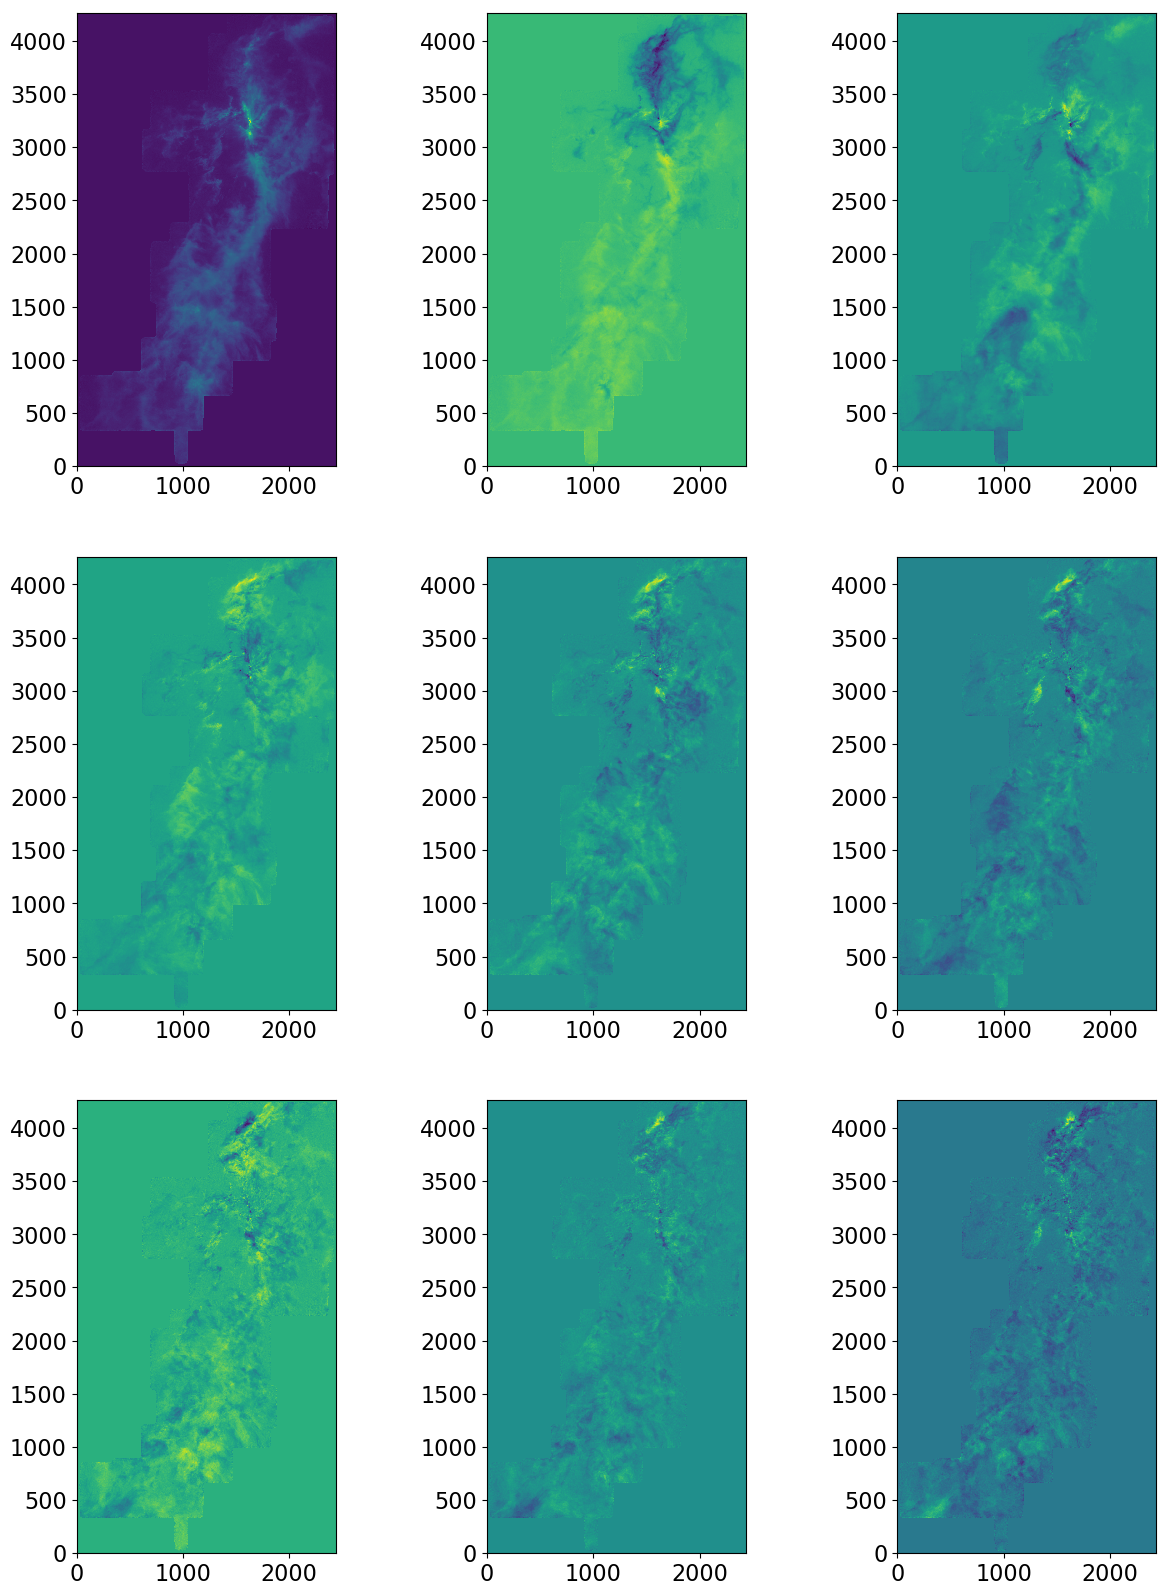

In [135]:
fig = plt.figure(figsize=(15,20))
for i in range(eigimages.shape[0]):
    ax = fig.add_subplot(3,3,i+1)
    ax.imshow(eigimages[i].T, origin='lower')
plt.savefig("13co_eigenimages.png", dpi=300)

## 13CO Covariance Matrix

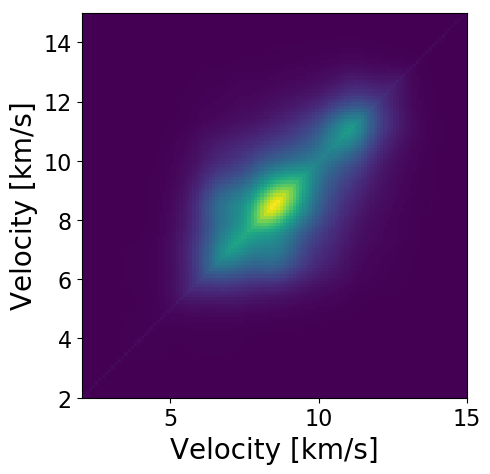

In [99]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
extent = 2*[cube_13co.spectral_extrema[0].value / 1000., cube_13co.spectral_extrema[1].value / 1000.]
im = plt.imshow(pca_13co.cov_matrix, origin='lower', extent=extent, interpolation=None)
plt.xlim(2,15)
plt.xlabel("Velocity [km/s]")
plt.ylim(2,15)
plt.ylabel("Velocity [km/s]")
ax.set_aspect(1)

(149,) (150,) (124,)


ValueError: shape mismatch: objects cannot be broadcast to a single shape

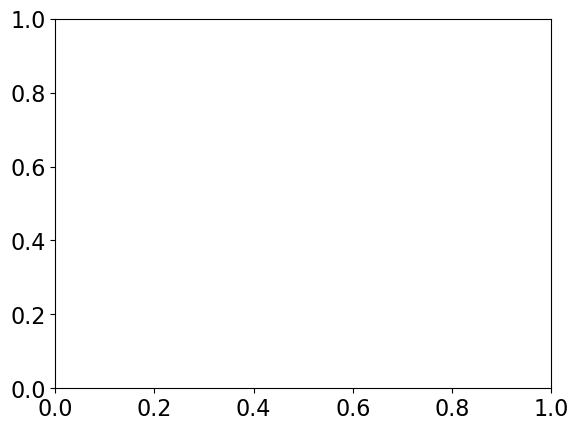

In [131]:
eigval_variance_cdf = pca_13co.eigvals[1:].cumsum()/pca_13co.total_variance
print(eigval_variance_cdf.shape, pca_13co.eigvals.shape, np.arange(1,pca_13co.n_eigs+1,1).shape)
plt.bar(np.arange(2, pca_13co.n_eigs+1), eigval_variance_cdf)
plt.xlabel("Eigenvalues")
plt.ylabel("Percent of Variance")

In [123]:
pca_13co.var_proportion(1)

TypeError: 'numpy.float64' object is not callable